# Text Vectorization

The first step in Natural Language Processing (NLP) is to get the words into a format that we can do math on them.

```{figure} https://microsoft.github.io/generative-ai-for-beginners/04-prompt-engineering-fundamentals/images/04-tokenizer-example.png
Tokenization of text.
```

## Pre-reading

- [DeepLearning AI: A Complete Guide to Natural Language Processing](https://www.deeplearning.ai/resources/natural-language-processing/)

### Objectives

- Gain a basic understanding of natural language processing (NLP)
- Prepare text data for computer processing.
- Vectorize text.

See [*Deep Learning with Python*, 11.0 - 11.3](https://learning.oreilly.com/library/view/deep-learning-with/9781617296864/Text/11.htm#heading_id_3)
for lots more information.

## Overview

### Natural Language Processing

> Natural language processing (NLP) is a field of computer science and a subfield of artificial intelligence that aims to make computers understand human language. NLP uses computational linguistics, which is the study of how language works, and various models based on statistics, machine learning, and deep learning.
> ~ [Geeks for Geeks: NLP Overview](https://www.geeksforgeeks.org/natural-language-processing-overview/)

*See the DeepLearning AI post for more **why**, what, and how*.

### Math with Words

> Deep learning models, being differentiable functions, can only process numeric tensors: they can’t take raw text as input.
> *Vectorizing* text is the process of transforming text into numeric tensors.
> ~ [*Deep Learning with Python, 2nd Ed*](https://learning.oreilly.com/library/view/deep-learning-with/9781617296864/Text/11.htm#:-:text=Deep%20learning%20models,into%20numeric%20tensors.)

0. **Explore** the dataset to see understand what it contains.
1. **Standardize** text to make it easier to process, such as by converting it to lowercase or removing formatting.
2. **Tokenize** the text by splitting it into units.
3. **Index** the tokens into a numerical vector.

```{figure} ../img/deep_learning_with_python-fig-11-01.png
From raw text to vectors, *Deep Learning with Python, 2nd Ed*, fig. 11.1
```

#### Exploration

Although not listed in the text book, but you should always begin with exploring the dataset to understand what it contains: data format and potential bias!

### Standardization

An example of standardization include converting to lowercase, standardizing punctuation and special characters, and stemming.

1. "My altitude is 7258' above sea-level, far, far above that of West Point or Annapolis!"
2. "My altitude is 7258 ft. above sea level, FAR FAR above that of West point or Annapolis!"

Both should result in:

- "my altitude is 7258 feet above sea level far far above that of west point or annapolis !"

### Tokenization

You can tokenize in different ways.

Here is an example of **word-level** tokenization.

```json
[
   "my", "altitude", "is", "7258", "feet", "above", "sea", "level", "far", "far",
   "above", "that", "of", "west", "point", "or", "annapolis", "!"
]
```

Here is an example of **bag-of-3-grams** tokenization.

```json
[
   "my altitude is", "altitude is 7258", "is 7258 feet", "7258 feet above", "feet above sea",
   "above sea level", "sea level far", "level far far", "far far above", "far above that",
   "above that of", "that of west", "of west point", "west point or", "point or annapolis"
]
```

### Indexing

The simplest way to represent tokens in a vector is with the **bag-of-words** approach, which just counts how many times each token appears in the text.

```json
{
   "my": 1, "altitude": 1, "is": 1, "7258": 1, "feet": 1, "above": 2, "sea": 1, "level": 1,
   "far": 2, "that": 1, "of": 1, "west": 1, "point": 1, "or": 1, "annapolis": 1, "!": 1
}
```

As simple as this is, it can be highly effective! However, you lose sequence information, which can be critical. Moving to N-grams can help!

**Sequence models** are a more advanced method of retaining sequence information, for more advanced use-cases.

## Exercise

For this exercise we will use [Inaugural Addresses from American Presidents](https://www.presidency.ucsb.edu/documents/app-categories/spoken-addresses-and-remarks/presidential/inaugural-addresses).

Go to the website now and think how you might put all of these into an easy-to-ingest document.

Fortunately, I"ve already extracted some of these and placed them in [book/data/inagural_addresses.csv](../data/inaugural_addresses.csv)

In [1]:
# Download the dataset, if not running in VSCode
# !wget https://raw.githubusercontent.com/USAFA-ECE/ece386-book/refs/heads/main/book/data/inaugural_addresses.csv

As always, we should preview some stats about what we are diving in to.

In [2]:
import pandas as pd

# Change if running in colab
csv_path = "../data/inaugural_addresses.csv"

# Load the CSV into a pandas DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame and its summary
df_head = df.head()
df_info = df.info()

df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   President  6 non-null      object
 1   Year       6 non-null      int64 
 2   Text       6 non-null      object
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


,President,Year,Text
0,Biden,2021,"Chief Justice Roberts, Vice President Harris, ..."
1,Trump,2017,"Chief Justice Roberts, President Carter, Presi..."
2,Obama,2013,Thank you. Thank you so much. Vice President ...
3,Obama,2009,"My fellow citizens, I stand here today humbled..."
4,Bush,2005,"Vice President Cheney, Mr. Chief Justice, Pres..."


### Word Clouds

Unlike numerical data, we cannot easily do things like mean, median, or standard deviation with text data.

Let's try a word cloud, just for fun.

In [3]:
%pip install -q wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


def plot_wordcloud(df: pd.DataFrame, column: str = "Text") -> None:
    # Set up the figure size and number of subplots
    fig, axes = plt.subplots(nrows=df.shape[0], ncols=1, figsize=(15, 30))

    # Loop through each row of the DataFrame and generate a word cloud from the column
    for i, (index, row) in enumerate(df.iterrows()):
        # Create a word cloud object
        wc = WordCloud(
            # stopwords is empty here, but can replace with wordcloud.STOPWORDS as a default list
            background_color="white",
            stopwords=[],
            max_words=100,
            width=800,
            height=400,
        )

        # Generate the word cloud from the column variable
        wc.generate(row[column])

        # Display the word cloud on the subplot
        axes[i].imshow(wc, interpolation="bilinear")
        axes[i].axis("off")
        axes[i].set_title(f"{row['President']} ({row['Year']})", fontsize=37)

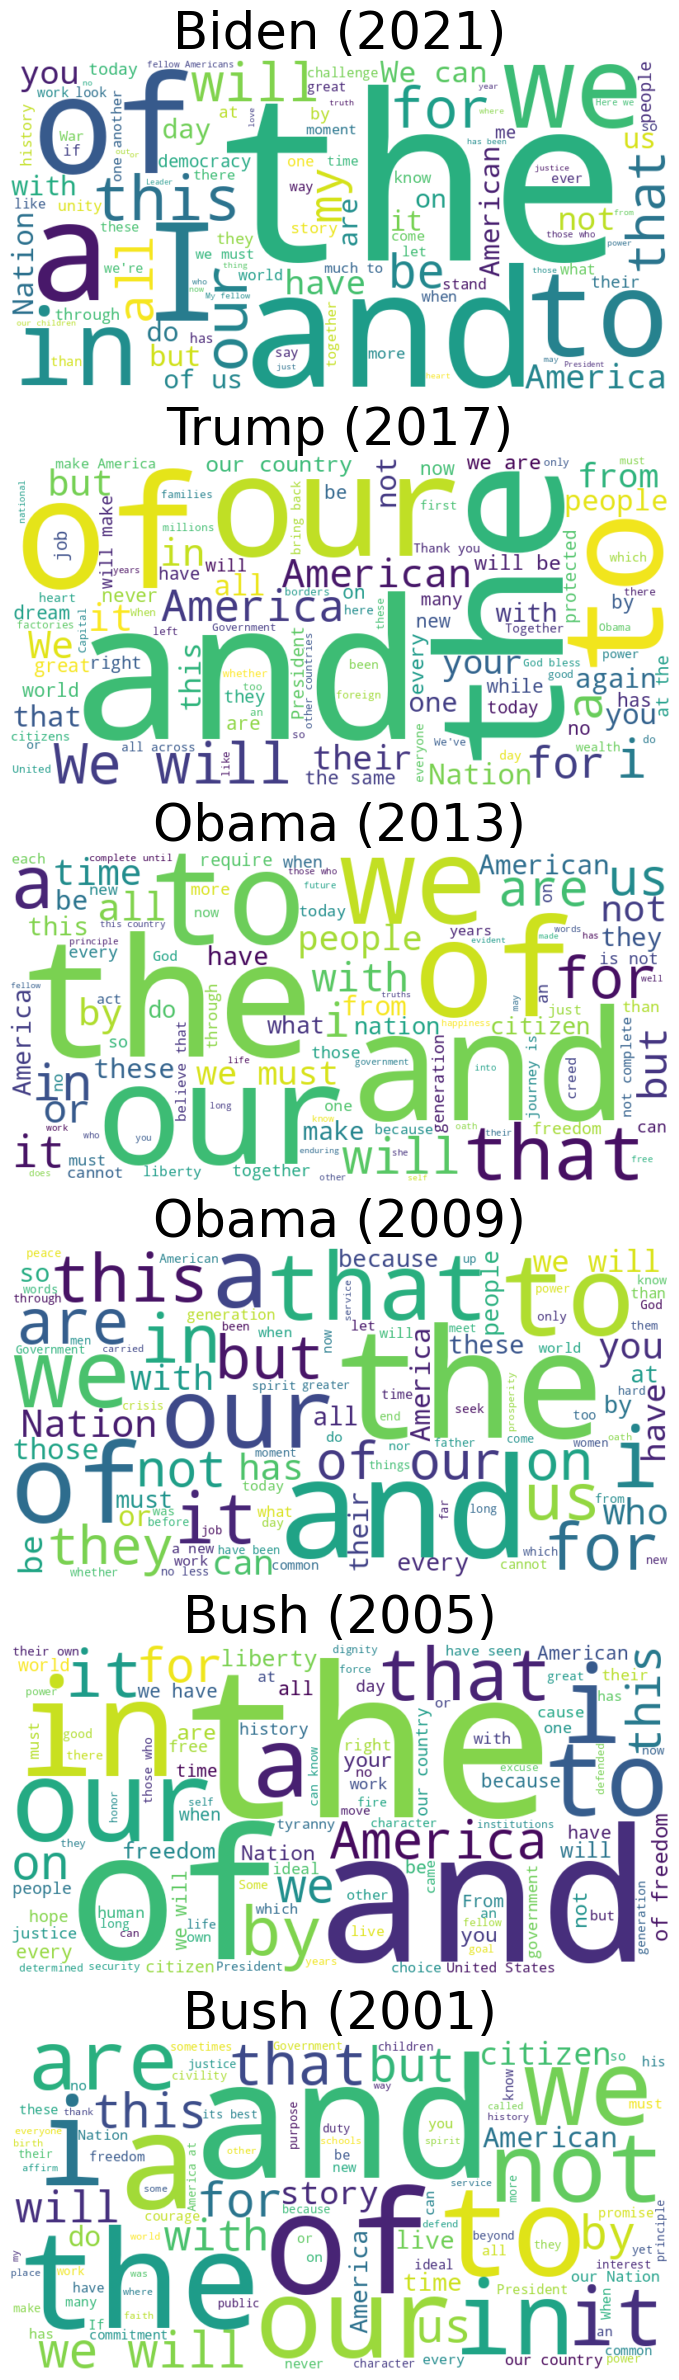

In [5]:
plot_wordcloud(df)

## Standardize

We will do the following to standardize our dataset:

1. Convert to lowercase
2. Remove stop words
2. Apply stemming

#### Stop Words

As you can see in word clouds, words such as "and" and "the" dominate, but don"t provide very much meaning.

To combat this, we will be [Removing stop words with NLTK in Python](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/).

```{note}
By default the `WordCloud` class applies english stop words present in the wordcloud.STOPWORDS list.
The code above deliberately prevented this by passing the argument `stopwords=[]`.
```

In [6]:
%pip install -q nltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /home/bcy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Stemming

**Stemming** reduces an inflected word to its base; for example: runs; running; ran --> "run".

In [8]:
from nltk.stem import PorterStemmer

# create an object of class PorterStemmer
porter = PorterStemmer()
print(porter.stem("play"))
print(porter.stem("playing"))
print(porter.stem("plays"))
print(porter.stem("played"))

play
play
play
play


##### Lemmatization

Another common text pre-processing technique is [lemmatization](https://en.wikipedia.org/wiki/Lemmatization).

> In linguistics, is the process of grouping together the inflected forms of a word so they can be analyzed as a single item, identified by the word"s lemma, or dictionary form.

**Stemming** reduces an inflected word to its base; for example: runs; running; ran --> "run".

**Lemmatizing** goes further by using knowledge of surrounding words.

1. The word "better" has "good" as its lemma. This link is missed by stemming, as it requires a dictionary look-up.
2. The word "walk" is the base form for the word "walking", and hence this is matched in both stemming and lemmatization.
3. The word "meeting" can be either the base form of a noun or a form of a verb ("to meet") depending on the context; e.g., "in our last meeting" or "We are meeting again tomorrow". Unlike stemming, lemmatization attempts to select the correct lemma depending on the context.

## Tokenize

Because of how `nltk` works, we will actually standardize while we tokenize. In our case, we will just do **word** tokens, but there are *many* other options!

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download a pre-trained tokenizer
# https://www.nltk.org/api/nltk.tokenize.punkt.html
nltk.download("punkt_tab")

# Reload df so it's fresh
df = pd.read_csv(csv_path)


# Presidents say America a lot, so add that to the stopwords
stopword_list = stopwords.words("english")
stopword_list.append("america")

# Initialize the stemmer
stemmer = PorterStemmer()


# Define a function that applies stemming and stopwords removal
def preprocess(text):
    # Tokenize the text word-by-word
    tokens = nltk.word_tokenize(text)

    # Convert to lowercase, remove stopwords, and apply stemming
    tokens = [
        stemmer.stem(word) for word in tokens if word.lower() not in stopword_list
    ]

    return tokens


# Apply the function to the "text" column
df["tokens"] = df["Text"].apply(preprocess)

# Preview the result
print(f"Original text: \n{df['Text'].head()}")
print(f"Tokens: \n{df['tokens'].head()}")

[nltk_data] Downloading package punkt_tab to /home/bcy/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Original text: 
0    Chief Justice Roberts, Vice President Harris, ...
1    Chief Justice Roberts, President Carter, Presi...
2    Thank you. Thank you so much.  Vice President ...
3    My fellow citizens, I stand here today humbled...
4    Vice President Cheney, Mr. Chief Justice, Pres...
Name: Text, dtype: object
Tokens: 
0    [chief, justic, robert, ,, vice, presid, harri...
1    [chief, justic, robert, ,, presid, carter, ,, ...
2    [thank, ., thank, much, ., vice, presid, biden...
3    [fellow, citizen, ,, stand, today, humbl, task...
4    [vice, presid, cheney, ,, mr., chief, justic, ...
Name: tokens, dtype: object


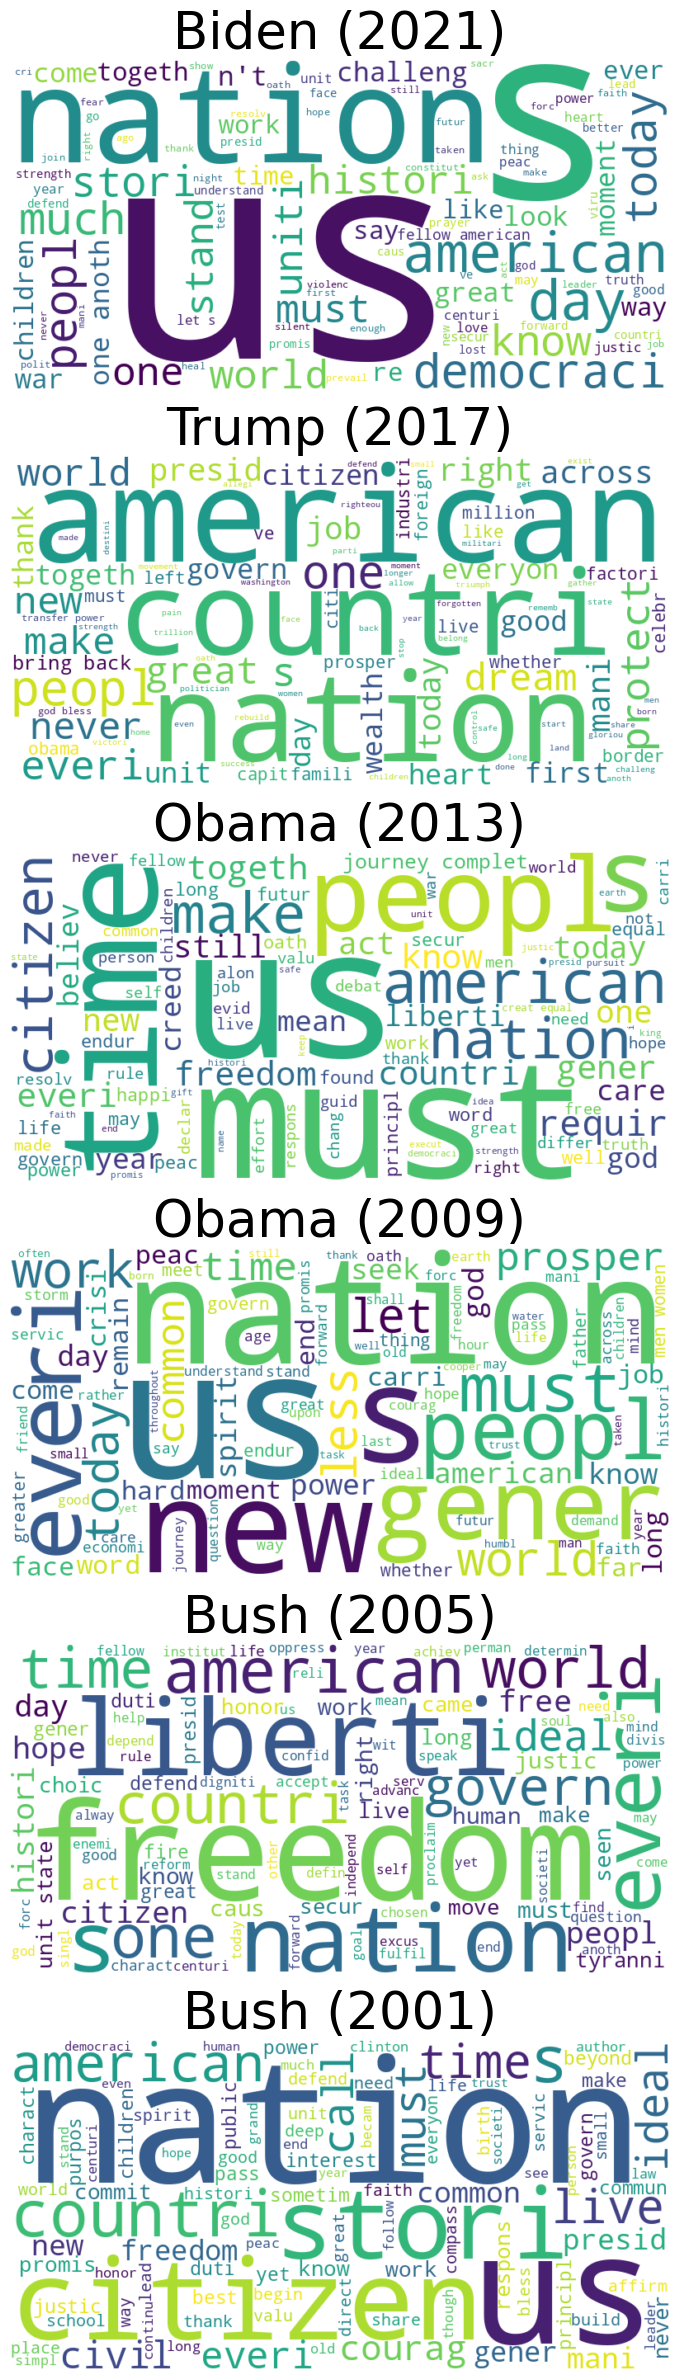

In [10]:
# Put clean text back into a string for wordcloud
df["standardized_text"] = df["tokens"].apply(lambda x: " ".join(x))
plot_wordcloud(df, "standardized_text")

## Index

Now we get to put our standardized words into a vector!

We will be using scikit-learn"s [CountVectorizer to Extracting Features from Text (Geeks for Geeks)](https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/).

> Class [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) converts a collection of text documents to a matrix of token counts.
> This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

### Bag of Words

The naive - but sometimes highly effective - approach is the "Bag of Words" approach: simply count how many times words show up!

This is actually what are word clouds are doing under the hood!

```{important}
This produces a **sparse matrix**, meaning there are lots of zeros!
As a pro, such matrices can be highly compressed. However, they also present unique challenges in machine learning.
```

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a Vectorizer Object
vectorizer = CountVectorizer()

document = df["standardized_text"]

vectorizer.fit(document)

# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)

# Encode the Document
vector = vectorizer.transform(document)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

Vocabulary:  {'chief': 232, 'justic': 820, 'robert': 1280, 'vice': 1631, 'presid': 1136, 'harri': 693, 'speaker': 1415, 'pelosi': 1077, 'leader': 848, 'schumer': 1315, 'mcconnel': 918, 'penc': 1079, 'distinguish': 425, 'guest': 675, 'fellow': 564, 'american': 61, 'day': 349, 'democraci': 380, 'histori': 720, 'hope': 728, 'renew': 1236, 'resolv': 1249, 'crucibl': 335, 'age': 36, 'test': 1520, 'anew': 70, 'risen': 1275, 'challeng': 221, 'today': 1543, 'celebr': 212, 'triumph': 1571, 'candid': 195, 'caus': 209, 'people': 1081, 'th': 1521, 'peopl': 1080, 'heard': 701, 'heed': 704, 've': 1628, 'learn': 850, 'preciou': 1124, 'fragil': 613, 'hour': 732, 'friend': 617, 'prevail': 1141, 'hallow': 680, 'ground': 666, 'ago': 39, 'violenc': 1638, 'sought': 1406, 'shake': 1347, 'capitol': 199, 'foundat': 610, 'come': 266, 'togeth': 1544, 'one': 1023, 'nation': 981, 'god': 646, 'indivis': 772, 'carri': 204, 'peac': 1073, 'transfer': 1559, 'power': 1121, 'two': 1581, 'centuri': 216, 'look': 886, 'ahe

#### Bigrams

We could instead [generate bigrams with NLTK (Geeks for Geeks)](https://www.geeksforgeeks.org/generate-bigrams-with-nltk/), and then index these. This could further increase our accuracy for some applications, but is more complex.

In [19]:
from nltk.util import bigrams

bigram_list = list(bigrams(df["tokens"].iloc[0]))

print("Sample bigrams from Biden's 2021 address:\n")
for bigram in bigram_list[1000:1040]:  # Print 40 bigrams from the middle of the speech
    print(bigram)

Sample bigrams from Biden's 2021 address:

('care', '?')
('?', 'pay')
('pay', 'mortgag')
('mortgag', '?')
('?', "''")
("''", 'think')
('think', 'famili')
('famili', ',')
(',', 'come')
('come', 'next')
('next', '.')
('.', 'promis')
('promis', ',')
(',', 'get')
('get', '.')
('.', 'answer')
('answer', 'turn')
('turn', 'inward')
('inward', ',')
(',', 'retreat')
('retreat', 'compet')
('compet', 'faction')
('faction', ',')
(',', 'distrust')
('distrust', "n't")
("n't", 'look')
('look', 'like')
('like', 'worship')
('worship', 'way')
('way', "n't")
("n't", 'get')
('get', 'news')
('news', 'sourc')
('sourc', '.')
('.', 'must')
('must', 'end')
('end', 'uncivil')
('uncivil', 'war')
('war', 'pit')
('pit', 'red')


## Conclusion

In this exercise you"ve learned some basics of how to explore, standardize, tokenize, and index words! This is critical to understand how NLP (including Large Language Models) is possible!